## Beispiel 1

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

X = np.array([[1, 2],
              [1.5, 1.8],
              [5, 8 ],
              [8, 8],
              [1, 0.6],
              [9,11]])

#plt.scatter(X[:,0], X[:,1], s=150)
#plt.show()

colors = 10*["g", "r", "c", "b", "k"]

In [11]:
class K_Means:
    
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]
            
        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []
            
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
                
            prev_centroids = dict(self.centroids)
            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                
            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False
                    
            if optimized:
                break           
                
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification        

453.3333333333334
102.72108843537411


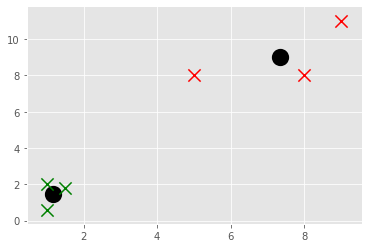

In [12]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        
plt.show()

## Testen der Vorhersagen

453.3333333333334
102.72108843537411


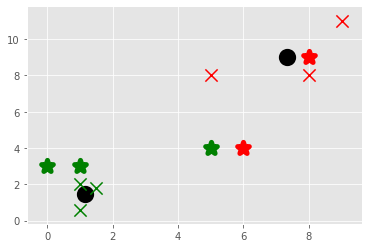

In [13]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        


unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()

## Beispiel 2

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import pandas as pd

##X = np.array([[1, 2],
##              [1.5, 1.8],
##              [5, 8],
##              [8, 8],
##              [1, 0.6],
##              [9, 11]])
##
##
##colors = ['r','g','b','c','k','o','y']



class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


# https://pythonprogramming.net/static/downloads/machine-learning-data/titanic.xls
df = pd.read_excel('../titanic.xls')
df.drop(['body','name'], 1, inplace=True)
#df.convert_objects(convert_numeric=True)
print(df.head())
df.fillna(0,inplace=True)

def handle_non_numerical_data(df):
    
    # handling non-numerical data: must convert.
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        #print(column,df[column].dtype)
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            
            column_contents = df[column].values.tolist()
            #finding just the uniques
            unique_elements = set(column_contents)
            # great, found them. 
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    # creating dict that contains new
                    # id per unique string
                    text_digit_vals[unique] = x
                    x+=1
            # now we map the new "id" vlaue
            # to replace the string. 
            df[column] = list(map(convert_to_int,df[column]))

    return df

df = handle_non_numerical_data(df)
print(df.head())

# add/remove features just to see impact they have.
df.drop(['ticket','home.dest'], 1, inplace=True)


X = np.array(df.drop(['survived'], 1).astype(float))
X = preprocessing.scale(X)
y = np.array(df['survived'])

#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.5)

clf = K_Means()
clf.fit(X)

correct = 0
for i in range(len(X)):

    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y[i]:
        correct += 1


print(correct/len(X))

   pclass  survived     sex      age  sibsp  parch  ticket      fare    cabin  \
0       1         1  female  29.0000      0      0   24160  211.3375       B5   
1       1         1    male   0.9167      1      2  113781  151.5500  C22 C26   
2       1         0  female   2.0000      1      2  113781  151.5500  C22 C26   
3       1         0    male  30.0000      1      2  113781  151.5500  C22 C26   
4       1         0  female  25.0000      1      2  113781  151.5500  C22 C26   

  embarked boat                        home.dest  
0        S    2                     St Louis, MO  
1        S   11  Montreal, PQ / Chesterville, ON  
2        S  NaN  Montreal, PQ / Chesterville, ON  
3        S  NaN  Montreal, PQ / Chesterville, ON  
4        S  NaN  Montreal, PQ / Chesterville, ON  
   pclass  survived  sex      age  sibsp  parch  ticket      fare  cabin  \
0       1         1    0  29.0000      0      0     755  211.3375     86   
1       1         1    1   0.9167      1      2     518